#### Imports

In [1]:

#Preprocesado de datos / carga de datos
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
# Modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Evaluación del modelo
from tensorflow.keras.models import load_model

#### Data

In [2]:
base_dir = "data"
train_dir = os.path.join(base_dir, 'train-cat-rabbit')
test_dir = os.path.join(base_dir, 'test-images')
valid_dir = os.path.join(base_dir, 'val-cat-rabbit')

#### Técnicas de Escalamiento y Preprocesado

In [3]:
train_datagen = ImageDataGenerator(
#Técnicas de preprocesamiento de datos para mejorar la categorización del modelo
				rescale = 1./255, 
				rotation_range = 30, 
				width_shift_range = 0.1, 
    			height_shift_range=0.1,
				zoom_range = 0.1,
				horizontal_flip = True,
				brightness_range=[0.5, 1],
    			fill_mode='nearest'
    )


#Técnicas de preprocesamiento de datos para mejorar la categorización del modelo

test_datagen = ImageDataGenerator(rescale = 1./255)       
# Escala los píxeles de las imágenes de prueba al rango [0, 1]
validation_datagen = ImageDataGenerator(rescale=1./255)


Found 1811 images belonging to 2 classes.
Found 426 images belonging to 2 classes.
Found 414 images belonging to 2 classes.


<Figure size 640x480 with 0 Axes>

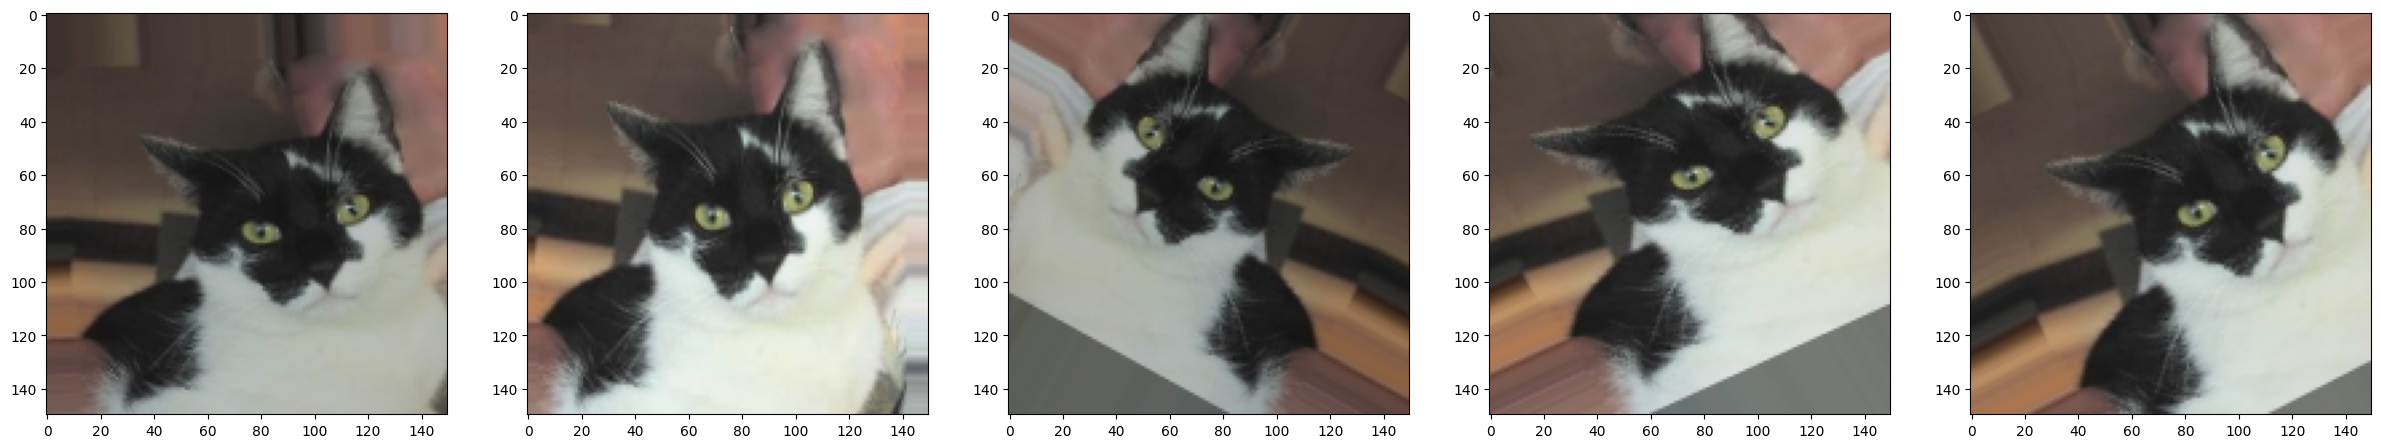

In [4]:

images_size = (150, 150) #Medida de las imágenes

train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = images_size, # Tamaño al que se redimensionan las imágenes
							batch_size = 32,  # Tamaño del lote de imágenes por batch
							class_mode ='binary', # Tipo de etiquetas: 'binary' porque hay dos clases (gato y conejo)
       						shuffle = True 
							)


test_generator = test_datagen.flow_from_directory(
							test_dir,
							target_size = images_size,
							batch_size = 32,  
							class_mode ='binary',
       						shuffle = False		
   							)


validation_generator = validation_datagen.flow_from_directory(
							valid_dir,
							target_size = images_size, 
							batch_size = 32, 
							class_mode ='binary', 
							shuffle = False
							)


plt.figure()
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

for i in range(5) :
  	axarr[i].imshow(train_generator[0][0][0])

(32, 150, 150, 3)
[0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 0. 1. 0. 0.]


<Figure size 640x480 with 0 Axes>

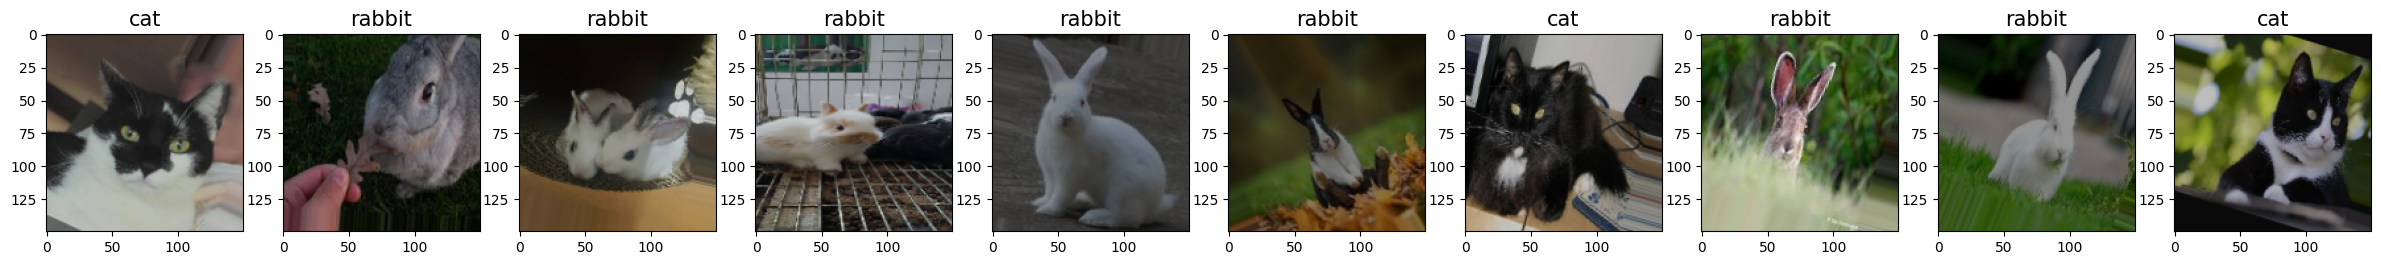

In [5]:
# Visualizar imágenes y las etiquetas despúes de escalamiento y preprocesado
images, labels = train_generator[0]
class_names = list(train_generator.class_indices.keys())

print(images.shape)
print(labels)

plt.figure()
f, axarr = plt.subplots(1, 10, figsize=(30, 7))

for i in range(10):
    axarr[i].imshow(images[i])
    axarr[i].set_title(class_names[int(labels[i])], fontsize=15)


#### Modelo

In [6]:
# Crear el modelo CNN

model = Sequential([
    
    
    # Capa 1: Convolucional con 32 filtros de 3x3, función de activación ReLU, y tamaño de entrada 150x150x3 
    # Capa de MaxPooling para redicir las dimensiones de la salida
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    # Capa 2: Convolucional con 64 filtros de 3x3, función de activación ReLU 
    # Capa de MaxPooling para redicir las dimensiones de la salida    
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    #Capa 3: Convolucional con 128 filtros de 3x3, función de activación ReLU
    #Capa de MaxPooling para redicir las dimensiones de la salida
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    Conv2D(226, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    #Aplanar la salida para pasarla a capas más densas
    Flatten(),
    
    #Poner en 0 de forma aleatoria un porcentaje de neuronas durante cada paso de entrenamiento
    Dropout(0.5),
    
    #Capa densa con 512 neuronas y función de activación ReLU
    #Capa de salida con una neurona de activación sigmoide para clasificar los gatos y conejos
    Dense(516, activation= "relu"),
    Dense(1, activation='sigmoid') 
])

# Compilar el modelo con optimizador Adam, pérdida binaria y métrica de precisión
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Mostrar resumen de la arquitectura del modelo
model.summary()

C:\Users\casas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 226)    │       260,578 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 226)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 7, 226)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 11074)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 11074)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 516)            │     5,714,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           517 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,069,043 (23.15 MB)

 Trainable params: 6,069,043 (23.15 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
        train_generator,              # Conjunto de entrenamiento con data-augmentation
        epochs=50,                    
        validation_data = validation_generator,   # Conjunto de validación para monitoreo
        verbose=1                     # Muestra el progreso en pantalla
)
# history = model.fit(
#         train_generator,
#         epochs=30,
#         steps_per_epoch=len(train_generator),
#         validation_data=validation_generator,
#         validation_steps=len(validation_generator),

# )

C:\Users\casas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 26s 421ms/step - accuracy: 0.5193 - loss: 0.7329 - val_accuracy: 0.5000 - val_loss: 0.6833
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 23s 409ms/step - accuracy: 0.5885 - loss: 0.6617 - val_accuracy: 0.6691 - val_loss: 0.6591
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 23s 408ms/step - accuracy: 0.5873 - loss: 0.6665 - val_accuracy: 0.6401 - val_loss: 0.6310
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 24s 414ms/step - accuracy: 0.6516 - loss: 0.6243 - val_accuracy: 0.6715 - val_loss: 0.6373
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 430ms/step - accuracy: 0.6484 - loss: 0.6323 - val_accuracy: 0.6594 - val_loss: 0.6409
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 24s 414ms/step - accuracy: 0.6191 - loss: 0.6417 - val_accuracy: 0.6618 - val_loss: 0.6212
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 24s 425ms/step - accuracy: 0.6184 - loss: 0.6496 - val_accuracy: 0.6715 - val_loss: 0.6099
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 24s 419ms/step - accuracy: 0.6135 - loss: 0.6424 - val_accu

In [8]:
# Guardar el modelo 
model.save('segundo_modelo.h5')

#### Evaluar el modelo

In [9]:
model = load_model('segundo_modelo.h5')

In [10]:
# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.4f}')


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.8379 - loss: 0.3877
Test accuracy: 0.8545


In [11]:
# Obtener predicciones
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)

# Etiquetas verdaderas
y_true = test_generator.classes
# Nombres de clases
class_labels = list(test_generator.class_indices.keys())

# Reporte de métricas
print("Reporte:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step
Reporte:

              precision    recall  f1-score   support

         cat       0.90      0.81      0.85       223
      rabbit       0.81      0.90      0.86       203

    accuracy                           0.85       426
   macro avg       0.86      0.86      0.85       426
weighted avg       0.86      0.85      0.85       426



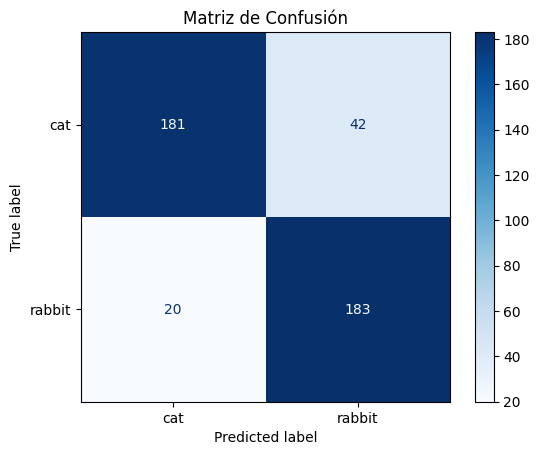

In [12]:
# Generar matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Mostrar matriz de confusión 
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(train_generator.class_indices.keys()))
cm_display.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

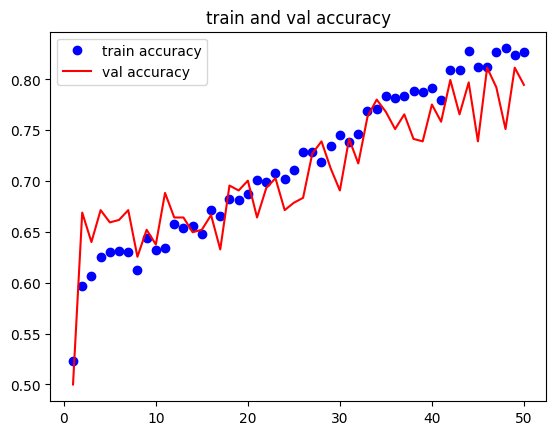

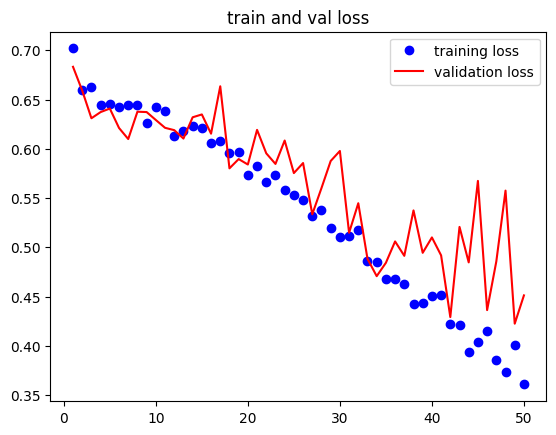

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

# Accuracy

plt.figure()
plt.plot(epochs,acc,'bo',label='train accuracy')
plt.plot(epochs,val_acc,'r',label='val accuracy')
plt.title('train and val accuracy')
plt.legend()
plt.show()

# Loss
plt.figure()
plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs, val_loss, 'r', label ='validation loss')
plt.title('train and val loss')
plt.legend()

plt.show()